In [81]:
import csv

from random import shuffle

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# Iris dataset

In [9]:
with open('iris_dataset.csv') as f:
    data = list(csv.reader(f))

In [23]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

Accuracy: 0.9


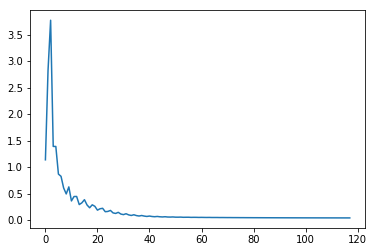

In [87]:
# shuffle data, assign training and testing samples and feature-scale them
shuffle(data)
X_train = [list(map(float, row[:-1])) for row in data[:140]]
X_test = [list(map(float, row[:-1])) for row in data[140:]]
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
y_train = [mapping[row[-1]] for row in data[:140]]
y_test = [mapping[row[-1]] for row in data[140:]]

# train and predict, show accuracy
mlp = MLPClassifier(learning_rate_init=0.3, max_iter=10000)
mlp.fit(X_train_norm, y_train)
print('Accuracy:', mlp.score(X_test_norm, y_test))

# plot loss curve
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_);

# Wine dataset

In [88]:
with open('wine.csv') as f:
    wine_data = list(csv.reader(f))

Accuracy: 0.9642857142857143


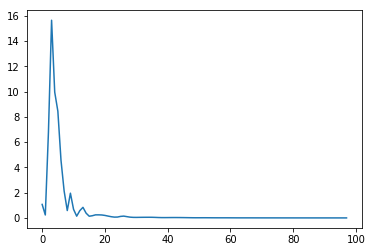

In [101]:
shuffle(wine_data)
X_train = MinMaxScaler().fit_transform([list(map(float, row[1:])) for row in wine_data[:150]])
X_test = MinMaxScaler().fit_transform([list(map(float, row[1:])) for row in wine_data[150:]])
y_train = [int(row[0]) for row in wine_data[:150]]
y_test = [int(row[0]) for row in wine_data[150:]]

mlp = MLPClassifier(learning_rate_init=0.3)
mlp.fit(X_train, y_train)
print('Accuracy:', mlp.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_);